# Assignment 2

## Question

In the computational biology field, identifying the correct set of clusters
helps to analyze the characteristics of the genes that helps to understand the
unknown gene characteristics. Also, finding the correct cluster centers is one
of the important steps for getting good results. In this assignment, you need
to find the correct clusters for the gene expression dataset.<br /><br />
Dataset:- The dataset is related to B-chronic lymphocytic leukemia(BCLL)
dataset which you can download from preprocessed_BCLL.txt . <br /><br />
a. Apply k-means algorithm on the dataset. Run the k-means algorithm
10 times where each time the number of clusters is randomly chosen
between 2 to sqrt(N), where N represents the number of datapoints.
For each iteration, also report the Silhouette score to understand
which is the best number of clusters. Show the answer in the
following format<br /><br />
####################################################<br /><br />

Iteration 1:- No of clusters = ##, Silhouette score= #####<br />
. . .<br />
. . .<br />
. . .<br />
Iteration 10:- No of clusters = ##, Silhouette score= #####<br /><br />
Please note, try to avoid the same number of clusters. Also plot a graph,
where we can understand the change of silhouette score along with cluster
centers.<br /><br />

b. From the previous question, we understand the best number of cluster
centers. So for that particular iteration, show the gene names for each
cluster. e.g Suppose the best possible cluster center is 5, then show
store the gene names in 5 different files where each file represents
each cluster.

## The Solution

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
from collections import Counter
from sklearn.metrics import silhouette_score
import random
import math
import os
import shutil

### Imported Data File in form of DataFrame

In [2]:
df = pd.read_csv('preprocessed_BCLL.txt', sep="	", header=None)
df = df.drop(columns=[23])
df.columns = ['Gene_ID', 'Gene_name', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21']
df.head()

,Gene_ID,Gene_name,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21
0,1009_at,HINT1,1145.5,1014.9,1103.1,850.4,886.6,859.3,1228.6,1231.9,...,763.7,1382.4,1008.2,1025.9,1197.0,735.2,865.3,485.0,811.1,783.0
1,100_g_at,RABGGTA,169.0,200.6,196.3,151.4,167.8,111.3,164.9,240.6,...,277.2,172.7,163.6,194.0,117.1,130.5,164.2,212.2,108.4,114.7
2,1011_s_at,YWHAE,25.9,31.7,43.3,40.9,40.8,26.7,45.1,62.0,...,12.5,53.6,72.8,59.6,33.3,35.8,45.3,68.0,56.7,39.3
3,1012_at,KAT2B,28.0,34.4,13.2,28.3,15.7,56.5,35.2,25.0,...,20.4,11.6,15.9,5.9,18.2,28.8,55.0,35.9,25.2,18.8
4,1013_at,SMAD5,17.2,3.0,6.0,9.9,10.0,16.7,1.5,10.0,...,1.4,6.5,12.3,11.3,9.2,2.1,4.7,1.3,5.4,3.8


### Normalizing the Features with Standard Scaler

In [3]:
scaler = StandardScaler()
df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])

### Generating a list of 10 random numbers for Number of clusters for 10 Iterations

In [4]:
numCluster = random.sample(range(2, int(math.sqrt(df.shape[0])) + 1), 10)
numCluster

[19, 48, 15, 36, 58, 25, 44, 21, 26, 10]

### Part a

#### Running the k-means clustering for 10 iterations and storing the Silhouette scores

In [5]:
scores = []
for i in range(len(numCluster)):  
    kmeans = KMeans(n_clusters=numCluster[i])
    kmeans.fit(df.iloc[:, 2:])
    labels = kmeans.predict(df.iloc[:, 2:])
    counter = Counter(labels)
    counter = sorted(counter.items())
    # counter

    score = silhouette_score(df.iloc[:, 2:], labels, metric='euclidean')
    scores.append(score)
    print("Iteration " + str(i+1) + ": No of clusters = " + str(numCluster[i]) + ", Silhouette score = " + str(score))

Iteration 1: No of clusters = 19, Silhouette score = 0.5160380871790511
Iteration 2: No of clusters = 48, Silhouette score = 0.4899282368360447
Iteration 3: No of clusters = 15, Silhouette score = 0.5988259834213245
Iteration 4: No of clusters = 36, Silhouette score = 0.4899528667620213
Iteration 5: No of clusters = 58, Silhouette score = 0.39478743725146687
Iteration 6: No of clusters = 25, Silhouette score = 0.49085214810742134
Iteration 7: No of clusters = 44, Silhouette score = 0.4029407867728354
Iteration 8: No of clusters = 21, Silhouette score = 0.5173422265924413
Iteration 9: No of clusters = 26, Silhouette score = 0.43126214490226383
Iteration 10: No of clusters = 10, Silhouette score = 0.6581147347702926


#### Silhouette scores v/s Number of Clusters

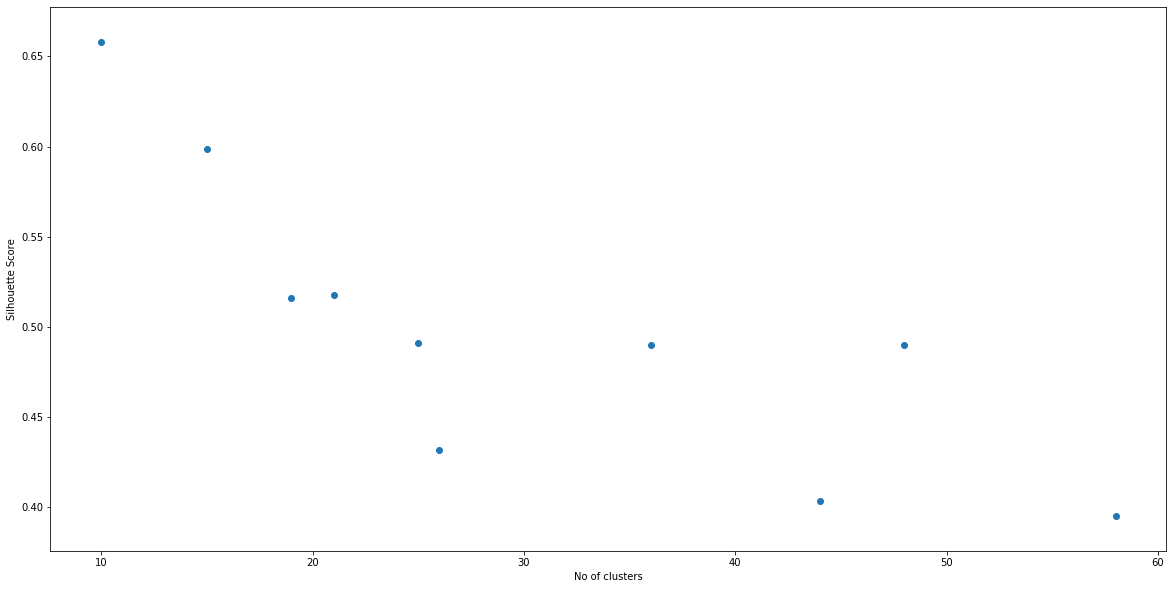

In [6]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.scatter(numCluster, scores)
plt.xlabel("No of clusters")
plt.ylabel("Silhouette Score")
plt.show()

### Part b

#### Running the k-means clustering for the best Silhouette score model

In [7]:
bestModelIndex = scores.index(max(scores))

bestClusterNum = numCluster[bestModelIndex]
print("Best cluster number = " + str(bestClusterNum))
kmeans = KMeans(n_clusters=bestClusterNum)
kmeans.fit(df.iloc[:, 2:])
labelsBest = kmeans.predict(df.iloc[:, 2:])


Best cluster number = 10


#### Delete the directory of clusters if it exists

In [8]:
if os.path.exists('clusters') and os.path.isdir('clusters'):
    shutil.rmtree('clusters')

#### Splitting the data into separate files according the clusters and storing them in a directory

In [9]:
df['label'] = labelsBest

dfToSave = df[['Gene_ID', 'Gene_name', 'label']]

dataFrameList = []
columnsToSave = ['Gene_ID', 'Gene_name']

os.mkdir('clusters')

for label, dfs in dfToSave.groupby('label'):
    dfs[columnsToSave].to_csv('./clusters/cluster_' + str(label) + '.csv', header=True, index=None)